# 서포트 벡터 머신(SVM)
서포트 벡터 머신은 선형이나 비선형 분류, 회귀, 이상치 탐색에 사용할 수 있는 다목적 머신러닝 모델이다.
<br>

복잡한 분류 문제에 특히 유용하며 작거나 중간 크기의 데이터에 적합하다. 또한 서포트 벡터 머신은 **비확률적 이진 선형 분류 모델**을 생성한다.
<br>

데이터가 사상된 공간에서 **경계로 표현**되며, 공간상에 존재하는 **여러 경계 중 가장 큰 폭을 가진 경계를 찾는다**. **마진을 최대화하는 초평면을 찾아 분류와 회귀를 수행**한다.
<br>

**비선형 분류**에도 사용되는데, 비선형 분류에서는 입력자료를 다차원 공간상으로 맵핑할 때 **커널 트릭(kernel trick)**을 사용하기도 한다.

<br>

- SVM은 **스케일링**에 민감하다. scaler를 활용할 경우 결정 경계가 훨씬 좋아진다.

모든 데이터가 경계선 바깥에 올바르게 분류되어 있다면 **하드 마진 분류**라고 한다. 하드 마진 분류에는 두 가지 문제점이 있다.
> 1. 데이터가 선형적으로 구분될 수 있어야 한다.
2. 이상치에 민감하다.

이런 문제를 피하기 위해 클래스 간의 결정선을 넓게 유지하는 것과 마진 오류 사이에 적절한 균형을 잡아야하는데, 이를 **소프트 마진 분류**라고 한다. **C** 파라미터를 사용해 균형을 조절한다.

<br>

- SVM은 클래스에 대한 확률을 제공하지 않는다.

비선형 데이터를 다루는 방법은 **다항 특성**과 같은 특성을 추가하는 것이다. 다항식 특성을 추가하는 것은 낮은 차수는 복잡한 데이터를 잘 표현하지 못하고, 높은 차수는 모델의 과접합이나 속도를 느리게 만든다. 이 때 **커널 트릭**을 사용해 실제로 특성을 추가하지는 않지만 특성을 추가한 것과 같은 결과를 얻을 수 있다.

<br>

- 대체적으로 **LinearSVC**가 **SVC(kernel="linear")**보다 훨씬 빠르다.
- 훈련 데이터가 너무 크지 않다면 **가우시안 RBF 커널**을 사용해도 좋다.

- LinearSVR은 수행 시간이 훈련 데이터 크기에 비례하여 선형적으로 늘어난다. 하지만 SVR은 훈련 데이터가 커지면 훨씬 느려진다.

<br>

> **장점**
- **분류**와 **예측**에 모두 사용 가능하다.
- 신경망 기법에 비해 **과적합 정도가 낮다**.
- 예측의 정확도가 높다.
- 저차원과 고차원의 데이터에 대해 모두 잘 작동한다.

<br>

> **단점**
- 전처리와 파라미터에 따라 정확도가 달라진다.
- 예측이 어떻게 이루어지는지에 대한 이해와 모델에 대한 해석이 어렵다.
- 대용량 데이터에 대한 모형 구축시 속도가 느리며 메모리 할달량이 크다.

<br>

> **용어**
- `초평면(decision hyperline)` : 각 그룹을 구분하는 분류자
- `서포트 벡터(support vector)` : 각 그룹에 속한 데이터 중에서도 초평면에 가장 가까이에 붙어있는 최전방 데이터들
- `마진(margin)` : 서포트 벡터와 초평면 사이의 수직 거리

<br>

> **파라미터**
- `C` : 클수록 하드마진(오류 허용X), 작을수록 소프트마진(오류 허용O)
- `gamma` : 결정경계를 얼마나 유연하게 그을 것인지를 결정한다. 클수록 경계가 복잡(과대적합), 작을수록 경계가 단순(과소적합)하다.


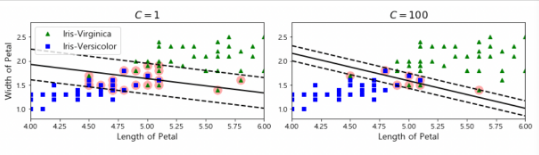

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [6]:
from sklearn.datasets import load_boston, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR
from sklearn.metrics import accuracy_score, mean_squared_error

## 분류(Classification)

In [7]:
df1 = pd.DataFrame(load_breast_cancer().data, columns=load_breast_cancer().feature_names)
df1['target'] = load_breast_cancer().target
df1.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [8]:
X1 = df1.iloc[:, :-1]
y1 = np.array(df1['target'])

In [9]:
scaler = StandardScaler()
scaled_X1 = scaler.fit_transform(X1)

In [10]:
X1_train, X1_test, y1_train, y1_test = train_test_split(scaled_X1, y1, test_size=0.2, random_state=94)

### LinearSVC

In [11]:
lsvc = LinearSVC(random_state=94)
lsvc.fit(X1_train, y1_train)

LinearSVC(random_state=94)

In [12]:
pred = lsvc.predict(X1_test)

In [13]:
acc = accuracy_score(y1_test, pred)
acc

1.0

In [14]:
f_imp = pd.DataFrame({'feature' : X1.columns.tolist(),
                      'importance' : lsvc.coef_.tolist()[0]})

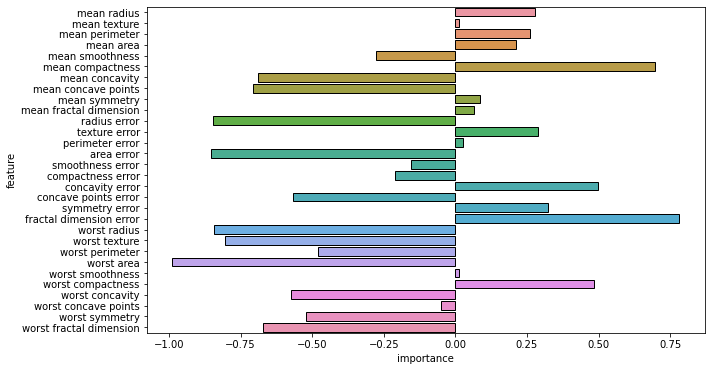

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(y=f_imp.feature, x=f_imp.importance, edgecolor=(0, 0, 0))
plt.show()

### SVC

In [20]:
svc = SVC(random_state=94, kernel='poly')
svc.fit(X1_train, y1_train)

SVC(kernel='poly', random_state=94)

In [21]:
pred = svc.predict(X1_test)

In [23]:
acc = accuracy_score(y1_test, pred)
acc

0.9298245614035088

## 회귀(Regression)

In [25]:
df2 = pd.DataFrame(load_boston().data, columns=load_boston().feature_names)
df2['target'] = load_boston().target
df2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [26]:
X2 = df2.iloc[:, :-1]
y2 = np.array(df2['target'])

In [27]:
scaler = StandardScaler()
scaled_X2 = scaler.fit_transform(X2)

In [28]:
X2_train, X2_test, y2_train, y2_test = train_test_split(scaled_X2, y2, test_size=0.2, random_state=94)

### LinearSVR

In [30]:
lsvr = LinearSVR(random_state=94)
lsvr.fit(X2_train, y2_train)

LinearSVR(random_state=94)

In [31]:
pred = lsvr.predict(X2_test)

In [33]:
mse = mean_squared_error(y2_test, pred)
mse

20.325131612024386

### SVR

In [34]:
svr = SVR()
svr.fit(X2_train, y2_train)

SVR()

In [35]:
pred = svr.predict(X2_test)

In [36]:
mse = mean_squared_error(y2_test, pred)
mse

23.062757884395975